In [26]:
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import os

In [2]:
def plot_colormap(data,title = "AUT and QUARTZ",path = ""):
    """
    Helper function to plot data with associated colormap.
    """
   # fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
    #                        constrained_layout=True, squeeze=False)
    figure, axes = plt.subplots(figsize=(data.shape[1]/5,data.shape[0]/5))
    psm = axes.pcolormesh(data, cmap='rainbow',rasterized=True)
    figure.colorbar(psm, ax=axes)
    axes.invert_yaxis()
    if abs(data.shape[1]-data.shape[0])<=1:
        print(data.shape[1],data.shape[0])
        axes.set_aspect('equal', adjustable='box')
    plt.title(title)
    #plt.savefig(path+" "+title)
    plt.show()

In [30]:
data_dir = "../data/221115_review/"
lst=os.listdir(data_dir)
files = []
for l in lst:
    if l[0] != '.':
        f_lst = os.listdir(data_dir+l)
        for f in f_lst:
            if '.png' not in f:
                files.append(data_dir+l+'/'+f)
files

['../data/221115_review/A_221015_250nm_negative/22o15003.abf-pqty=25_current.csv',
 '../data/221115_review/A_221015_250nm_negative/22o15003.abf_current_div-pqty=25.csv',
 '../data/221115_review/A_221015_250nm_negative/22o15003.abf_current_subs-pqty=25.csv',
 '../data/221115_review/A_221015_250nm_negative/22o15003.abf_EMF-pqty=25.csv',
 '../data/221115_review/A_221015_250nm_negative/22o15003.abf_EMF_close-pqty=25.csv',
 '../data/221115_review/A_221015_250nm_negative/22o15003.abf_EMF_div-pqty=25.csv',
 '../data/221115_review/A_221015_250nm_negative/22o15003.abf_EMF_far-pqty=25.csv',
 '../data/221115_review/A_221015_250nm_negative/22o15003.abf_EMF_subs-pqty=25.csv',
 '../data/221115_review/A_221015_250nm_positive/22o15002.abf-pqty=25_current.csv',
 '../data/221115_review/A_221015_250nm_positive/22o15002.abf_current_div-pqty=25.csv',
 '../data/221115_review/A_221015_250nm_positive/22o15002.abf_current_subs-pqty=25.csv',
 '../data/221115_review/A_221015_250nm_positive/22o15002.abf_EMF-pqty=

In [190]:
def process(path):
    if 'div' not in path and 'subs' not in path:
        return
    else:
        print(path)
    df = pd.read_csv(path,header = None)
    Z = np.transpose(np.array(df))
    
    # Plot 2 plots
    figure, axes = plt.subplots(1,4,figsize=(Z.shape[1]/5,Z.shape[0]/5))
    axes[0].invert_yaxis()
    axes[1].invert_yaxis()
    axes[0].set_aspect('equal', adjustable='box')
    axes[1].set_aspect('equal', adjustable='box')
    
    psm = axes[0].pcolormesh(Z, cmap='rainbow',rasterized=True)
    #figure.colorbar(psm, ax=axes)
    axes[0].set_title("Original")
    
    bins = [np.mean(Z)]
    z_dig = np.digitize(Z,bins)
    D = (1-z_dig)*Z
    '''
    if 'neg' in p and 'subs' in p:
        D = z_dig*Z
    else:
        D = (1-z_dig)*Z
    ''' 
    psm = axes[1].pcolormesh(D, cmap='Blues',rasterized=True)
    #figure.colorbar(psm, ax=axes)
    axes[1].set_title("After process")
    
    
    class1 = (z_dig*Z).flatten()
    class2 = ((1-z_dig)*Z).flatten()
    mean1 = np.mean(class1)
    std1 = np.std(class1)
    mean2 = np.mean(class2)
    std2 = np.std(class2)
    print(len(class1))
    #axes[2].hist((list(class1),list(class2)),bins=bins,label = ('%.2f +- %.2f'.format(mean1,std1),'%.2f +- %.2f'.format(mean2,std2)),color = ('red','blue'))
    ax = plt.subplot2grid((1,4),(1,),colspan=2)
    ax.hist(class1,bins=20,label = "{:.2f} + {:.2f}".format(mean1,std1),color = 'red')
    ax.hist(class2,bins=20,label = "{:.2f} + {:.2f}".format(mean2,std2),color = 'blue')
    ax.legend()

    plt.show()
    
    

../data/221115_review/A_221015_250nm_negative/22o15003.abf_current_div-pqty=25.csv
2450


ValueError: not enough values to unpack (expected 2, got 1)

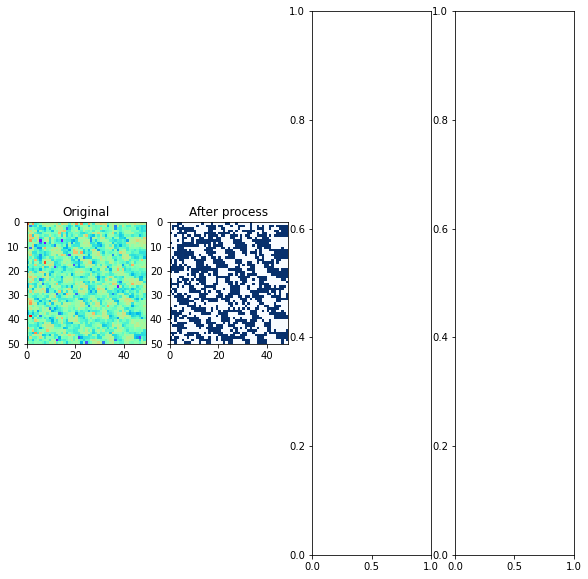

In [191]:
for p in files:
    process(p)

In [21]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [22]:
x = np.linspace(0,48,49)
y = np.linspace(0,49,50)
X, Y = np.meshgrid(x, y)
Z = np.transpose(np.array(df))

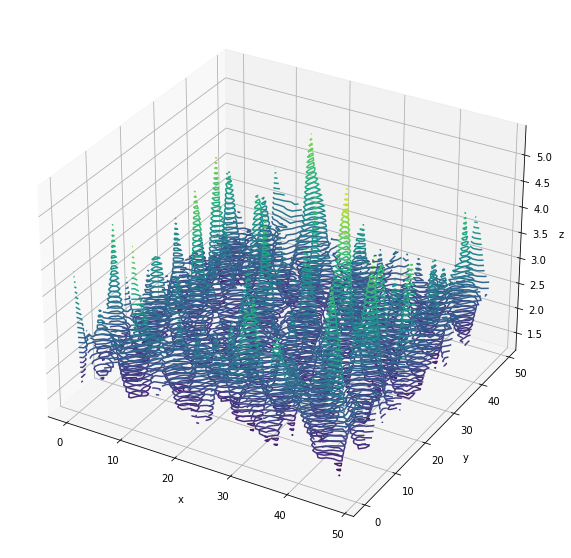

In [23]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

49 50


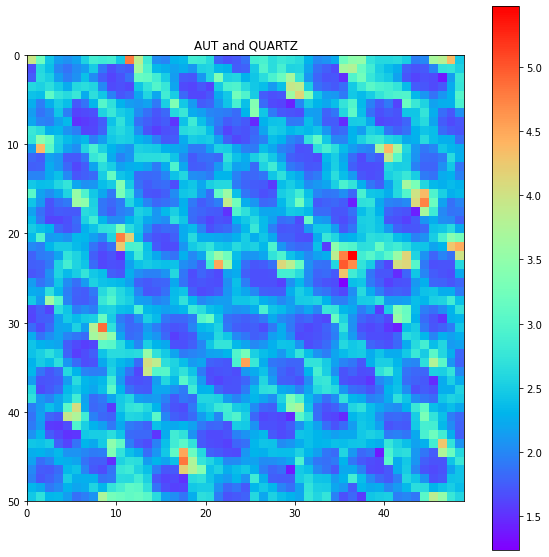

In [24]:
plot_colormap(Z)

49 50


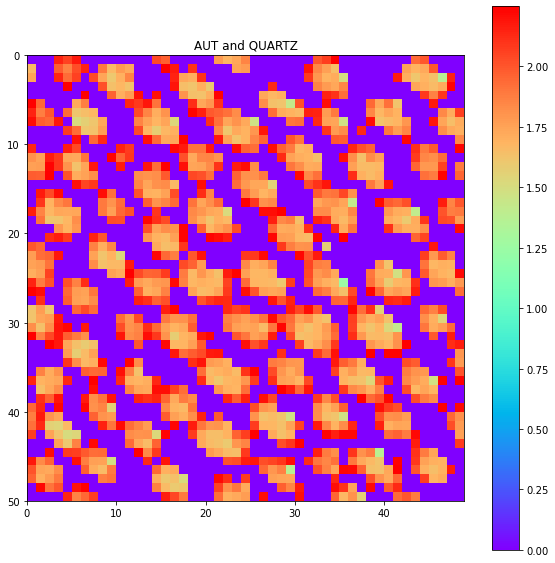

In [25]:
bins = [np.mean(Z)]
z_dig = np.digitize(Z,bins)
plot_colormap((1-z_dig)*Z)